<a href="https://colab.research.google.com/github/chandrasure/LEAF-DISEASE-DETECTION-using-CNN/blob/main/LEAF_DISEASE_DETECTION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PlantVillage1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/10f41035-20e2-4037-96b6-474ce343d6c2___RS_LB 2725.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/14691d2b-446b-4f0e-921b-60d3b76cbf03___RS_LB 2518 (1).JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/01a8cc9f-074a-4866-87c8-bb5a9e3895b4___RS_LB 2968.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/1736a728-bae9-4133-bfca-60a7c3b6382c___RS_LB 4855.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/04bbcc55-93d3-4a19-9137-8de036a8a4db___RS_LB 2647.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/04fe5855-ec9c-40b3-9893-ca8addc236bd___RS_LB 4913.JPG
/content/drive/MyDrive/PlantVillage1/Potato___Late_blight/1cd0b065-e637-4307-9e0a-9c20dc44cc59___RS_

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
file_path = '/content/drive/MyDrive/PlantVillage1'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Potato___Late_blight',
 'Potato___Early_blight',
 'Potato___healthy',
 'Pepper__bell___healthy',
 'Pepper__bell___Bacterial_spot']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Filepath,Label
0,/content/drive/MyDrive/PlantVillage1/Pepper__b...,Pepper__bell___healthy
1,/content/drive/MyDrive/PlantVillage1/Potato___...,Potato___Late_blight
2,/content/drive/MyDrive/PlantVillage1/Potato___...,Potato___Late_blight
3,/content/drive/MyDrive/PlantVillage1/Pepper__b...,Pepper__bell___Bacterial_spot
4,/content/drive/MyDrive/PlantVillage1/Potato___...,Potato___Late_blight


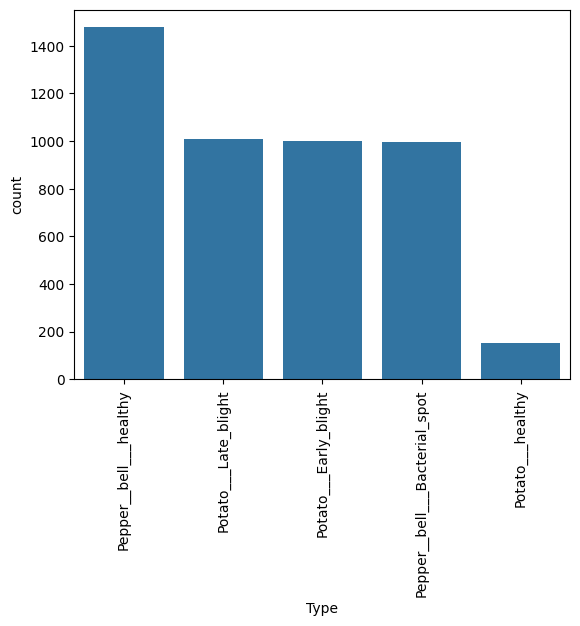

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

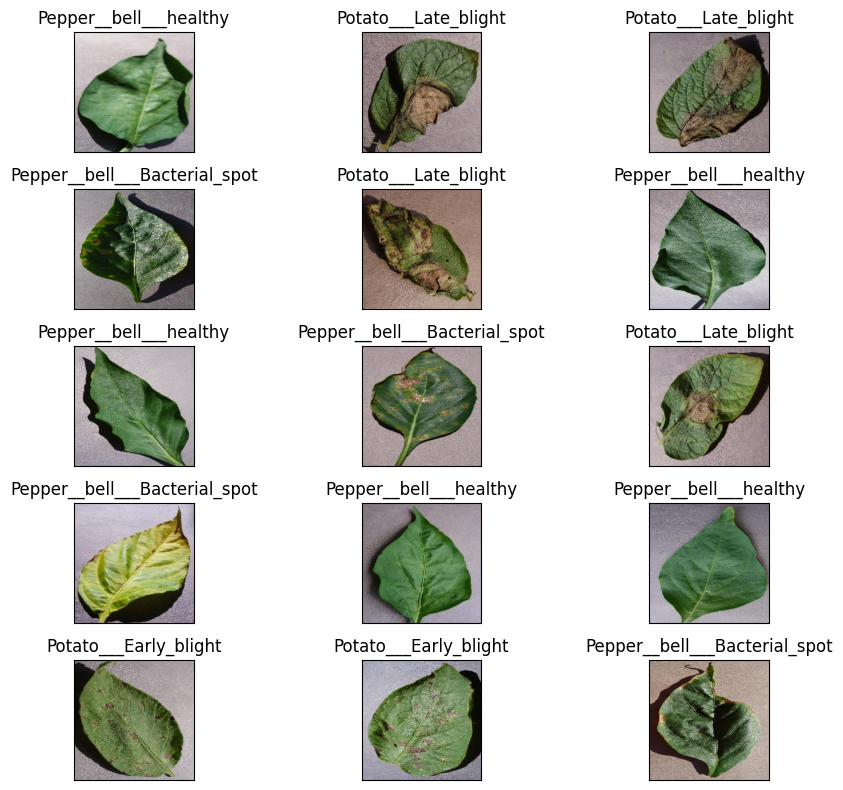

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 3477 validated image filenames belonging to 5 classes.
Found 3477 validated image filenames belonging to 5 classes.
Found 1160 validated image filenames belonging to 5 classes.


In [ ]:
# feature extraction(shape,color,edges and textures)
pretrained_model = VGG19(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [ ]:
inputs = pretrained_model.input

x = Dense(64, activation='relu')(pretrained_model.output)
x = Dense(64, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=4,
    callbacks=my_callbacks
)

Epoch 1/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 2578s 24s/step - accuracy: 0.5681 - loss: 1.0560 - val_accuracy: 0.5764 - val_loss: 0.9652
Epoch 2/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 2594s 24s/step - accuracy: 0.6813 - loss: 0.7448 - val_accuracy: 0.7207 - val_loss: 0.6171
Epoch 3/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 2602s 24s/step - accuracy: 0.7667 - loss: 0.5702 - val_accuracy: 0.7875 - val_loss: 0.5993
Epoch 4/4
109/109 ━━━━━━━━━━━━━━━━━━━━ 2561s 23s/step - accuracy: 0.7926 - loss: 0.5519 - val_accuracy: 0.7251 - val_loss: 0.7463


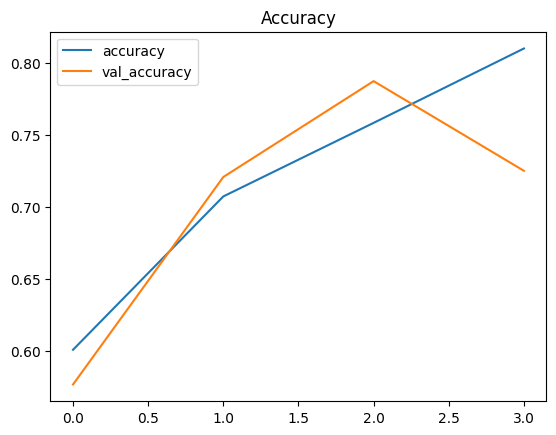

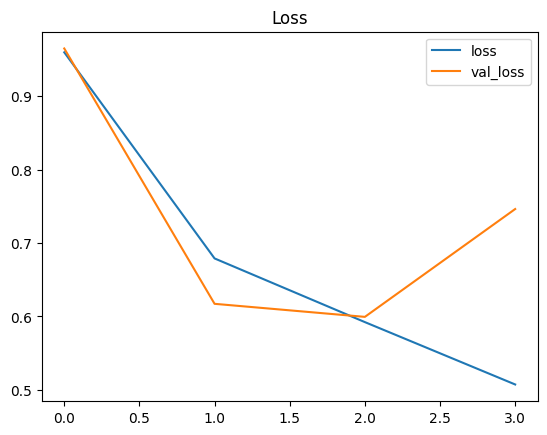

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 1.74382
Test Accuracy: 83.03%


In [ ]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)


labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

37/37 ━━━━━━━━━━━━━━━━━━━━ 181s 5s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.35      0.25      0.29       248
       Pepper__bell___healthy       0.92      0.87      0.90       366
        Potato___Early_blight       0.47      1.00      0.64       249
         Potato___Late_blight       0.55      0.22      0.31       260
             Potato___healthy       0.00      0.00      0.00        37

                     accuracy                           0.59      1160
                    macro avg       0.46      0.47      0.43      1160
                 weighted avg       0.59      0.59      0.55      1160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


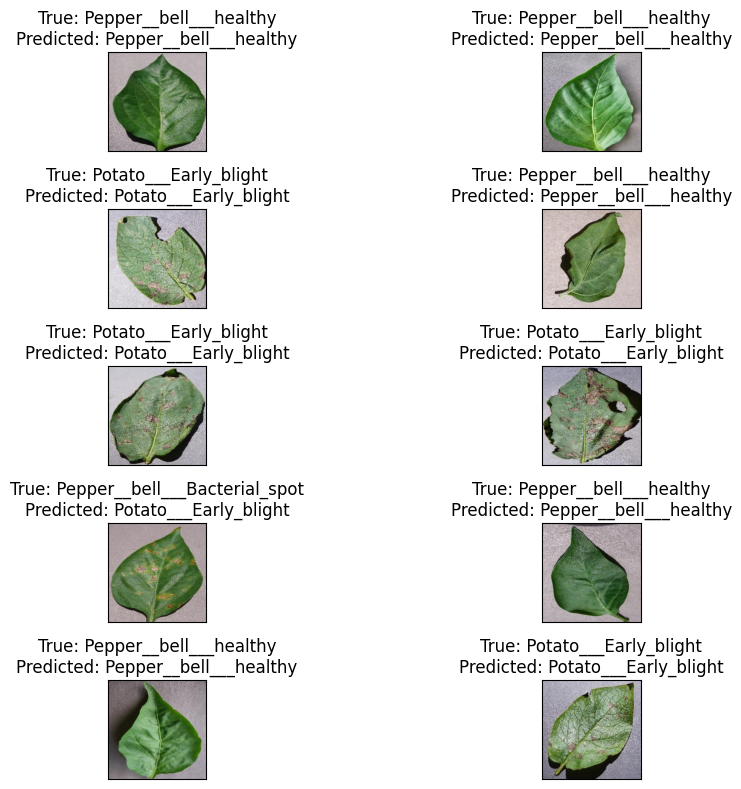

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

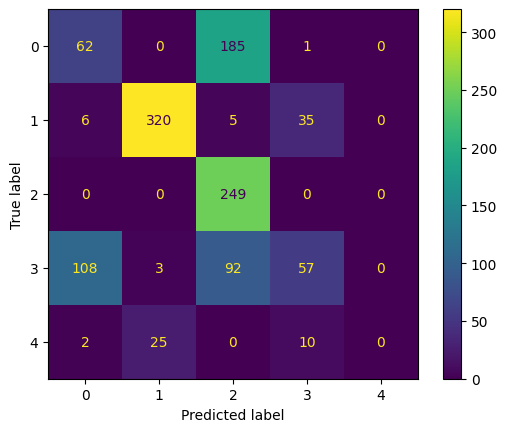

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=labels)
disp.plot()
plt.show()